## Settings

In [ ]:
!pip install datasets transformers torchaudio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
!pip install --upgrade peft

In [ ]:
!pip install jiwer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 34.0 MB/s eta 0:00:00


In [ ]:
# 1. Google Colab 설정
import os
from zipfile import ZipFile

# Google Colab에서 런타임 설정을 위해 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Dataset

### Dataset load

In [ ]:
import os
import zipfile  # zipfile 모듈을 가져옵니다.

# 압축 파일 경로 (업로드한 파일의 경로에 따라 변경)
zip_file_path = '/content/archive.zip'
output_dir = '/content/dataset'

# 압축 해제
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(output_dir)

print("압축 해제가 완료되었습니다.")

# 데이터셋 구조 확인
for root, dirs, files in os.walk(output_dir):
    print(root, len(files), "개의 파일")

압축 해제가 완료되었습니다.
/content/dataset 0 개의 파일
/content/dataset/archive 1 개의 파일
/content/dataset/archive/Dysarthria and Non Dysarthria 1 개의 파일
/content/dataset/archive/Dysarthria and Non Dysarthria/Dataset 1 개의 파일
/content/dataset/archive/Dysarthria and Non Dysarthria/Dataset/Male_Dysarthria 0 개의 파일
/content/dataset/archive/Dysarthria and Non Dysarthria/Dataset/Male_Dysarthria/M04 0 개의 파일
/content/dataset/archive/Dysarthria and Non Dysarthria/Dataset/Male_Dysarthria/M04/Session2 0 개의 파일
/content/dataset/archive/Dysarthria and Non Dysarthria/Dataset/Male_Dysarthria/M04/Session2/Wav 24 개의 파일
/content/dataset/archive/Dysarthria and Non Dysarthria/Dataset/Male_Dysarthria/M03 0 개의 파일
/content/dataset/archive/Dysarthria and Non Dysarthria/Dataset/Male_Dysarthria/M03/Session2 0 개의 파일
/content/dataset/archive/Dysarthria and Non Dysarthria/Dataset/Male_Dysarthria/M03/Session2/Wav 247 개의 파일
/content/dataset/archive/Dysarthria and Non Dysarthria/Dataset/Male_Dysarthria/M03/Session2/Txt 247 개의 파일
/conte

In [ ]:
import os
import shutil

# Define the paths
source_path = "/content/dataset/archive/Dysarthria and Non Dysarthria"
destination_path = "/content/dataset/Dysarthria and Non Dysarthria"
archive_path = "/content/dataset/archive"
macosx_path = "/content/dataset/__MACOSX"

# Step 1: Move 'Dysarthria and Non Dysarthria' to the new location
try:
    if os.path.exists(source_path):
        shutil.move(source_path, destination_path)
        print(f"Moved '{source_path}' to '{destination_path}'.")
    else:
        print(f"Source path '{source_path}' does not exist.")
except Exception as e:
    print(f"Error moving '{source_path}': {e}")

# Step 2: Delete the empty 'archive' folder
try:
    if os.path.exists(archive_path):  # Check if empty
        shutil.rmtree(archive_path)
        print(f"Deleted folder: '{archive_path}'.")
    else:
        print(f"Folder '{archive_path}' is does not exist.")
except Exception as e:
    print(f"Error deleting folder '{archive_path}': {e}")

# Step 3: Delete the non-empty '__MACOSX' folder
try:
    if os.path.exists(macosx_path):
        shutil.rmtree(macosx_path)  # Remove the folder and all its contents
        print(f"Deleted folder and contents: '{macosx_path}'.")
    else:
        print(f"Folder '{macosx_path}' does not exist.")
except Exception as e:
    print(f"Error deleting folder '{macosx_path}': {e}")


Moved '/content/dataset/archive/Dysarthria and Non Dysarthria' to '/content/dataset/Dysarthria and Non Dysarthria'.
Deleted folder: '/content/dataset/archive'.
Deleted folder and contents: '/content/dataset/__MACOSX'.


### Dataset Analysis

Dysarthria만

In [ ]:
import os
import librosa

# Define the paths
female_dysarthria_path = "/content/dataset/Dysarthria and Non Dysarthria/Dataset/Female_dysarthria"
male_dysarthria_path = "/content/dataset/Dysarthria and Non Dysarthria/Dataset/Male_Dysarthria"

# Function to count and calculate audio durations
def Dysarthria_info(directory):
    total_files = 0
    total_duration = 0.0

    for root, _, files in os.walk(directory):
        wav_files = [f for f in files if f.endswith('.wav')]
        total_files += len(wav_files)

        for wav_file in wav_files:
            file_path = os.path.join(root, wav_file)
            try:
                y, sr = librosa.load(file_path, sr=None)
                duration = len(y) / sr  # Calculate duration in seconds
                total_duration += duration
            except Exception as e:
                print(f"Error processing file {file_path}: {e}")

    return total_files, total_duration

# Calculate stats for Female Dysarthria
female_files, female_duration = Dysarthria_info(female_dysarthria_path)

# Calculate stats for Male Dysarthria
male_files, male_duration = Dysarthria_info(male_dysarthria_path)

# Display results
print(f"Female Dysarthria: {female_files} .wav files, Total Duration: {female_duration:.2f} seconds")
print(f"Male Dysarthria: {male_files} .wav files, Total Duration: {male_duration:.2f} seconds")


Female Dysarthria: 675 .wav files, Total Duration: 1663.43 seconds
Male Dysarthria: 635 .wav files, Total Duration: 2465.26 seconds


전체 데이터셋

In [ ]:
import os
import wave
import contextlib

# 데이터셋 경로 설정
dataset_path = '/content/dataset/Dysarthria and Non Dysarthria/Dataset'

# 결과를 저장할 변수 초기화
audio_file_count = 0
total_duration = 0.0
file_lengths = []

# 데이터셋 내 파일 탐색 및 분석
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith('.wav'):  # 확장자가 .wav인 파일을 대상으로 분석
            file_path = os.path.join(root, file)
            try:
                # 오디오 파일의 길이 계산
                with contextlib.closing(wave.open(file_path, 'r')) as audio:
                    frames = audio.getnframes()
                    rate = audio.getframerate()
                    duration = frames / float(rate)
                    file_lengths.append(duration)
                    total_duration += duration
                    audio_file_count += 1
            except (wave.Error, EOFError) as e:
                # 에러 발생 시 경고 메시지 출력 후 파일 건너뛰기
                print(f"파일 {file_path} 분석 중 에러 발생: {e}")
                continue

# 분석 결과 출력
if audio_file_count > 0:
    print(f"총 음성 파일 개수: {audio_file_count}개")
    print(f"전체 파일 길이 합: {total_duration:.2f}초")
    print(f"평균 파일 길이: {total_duration / audio_file_count:.2f}초")
    print(f"최소 파일 길이: {min(file_lengths):.2f}초")
    print(f"최대 파일 길이: {max(file_lengths):.2f}초")
else:
    print("유효한 음성 파일이 없습니다.")

총 음성 파일 개수: 4237개
전체 파일 길이 합: 11865.15초
평균 파일 길이: 2.80초
최소 파일 길이: 0.01초
최대 파일 길이: 23.18초


### Train/Test split

Train: D + ND

Val / Test : D

In [ ]:
import os
import torch
from sklearn.model_selection import train_test_split
import numpy as np

# 데이터 로드 함수
def load_data_from_path(directory):
    data = []
    for root, _, files in os.walk(directory):
        # 경로에서 성별과 Dysarthria 여부 추출
        parts = root.split("/")  # "/" 기준으로 분리
        if len(parts) <= 5:  # 유효하지 않은 경로는 무시
            continue

        folder_name = parts[5]  # 기준 폴더명 추출 (6번째 요소)
        if "Female" in folder_name:
            gender = "Female"
        elif "Male" in folder_name:
            gender = "Male"
        else:
            continue

        if "Non_Dysarthria" in folder_name:
            dysarthria = "Non_Dysarthria"
        else:
            dysarthria = "Dysarthria"

        # "Wav" 폴더에서만 오디오 파일 로드
        if "Wav" in root:
            for file in files:
                if file.endswith(".wav"):
                    audio_path = os.path.join(root, file)
                    text_path = audio_path.replace("Wav", "Txt").replace(".wav", ".txt")
                    if os.path.exists(text_path):
                        with open(text_path, "r", encoding="utf-8") as f:
                            text = f.read().strip()
                        data.append({
                            "audio": audio_path,
                            "text": text,
                            "gender": gender,
                            "dysarthria": dysarthria
                        })
    return data

# 데이터 로드
data_directory = "/content/dataset/Dysarthria and Non Dysarthria/Dataset"
data = load_data_from_path(data_directory)

# Dysarthria와 Non_Dysarthria 데이터 분리
non_dysarthria_data = [item for item in data if item["dysarthria"] == "Non_Dysarthria"]
dysarthria_data = [item for item in data if item["dysarthria"] == "Dysarthria"]

# Dysarthria 데이터를 Male/Female로 분리
male_dysarthria = [item for item in dysarthria_data if item["gender"] == "Male"]
female_dysarthria = [item for item in dysarthria_data if item["gender"] == "Female"]

# Non-Dysarthria 데이터를 Male/Female로 분리
male_non_dysarthria = [item for item in non_dysarthria_data if item["gender"] == "Male"]
female_non_dysarthria = [item for item in non_dysarthria_data if item["gender"] == "Female"]

# Dysarthria 데이터를 Train, Validation, Test로 분리
dysarthria_train, dysarthria_remaining = train_test_split(
    dysarthria_data, test_size=0.4, stratify=[item["gender"] for item in dysarthria_data], random_state=42
)

dysarthria_val, dysarthria_test = train_test_split(
    dysarthria_remaining, test_size=0.5, stratify=[item["gender"] for item in dysarthria_remaining], random_state=42
)

# Non-Dysarthria 데이터를 Dysarthria Train 크기에 맞게 추출
non_dysarthria_count = len(dysarthria_train)
male_non_ratio = len(male_non_dysarthria) / len(non_dysarthria_data)
female_non_ratio = len(female_non_dysarthria) / len(non_dysarthria_data)

male_non_train = np.random.choice(male_non_dysarthria, size=int(non_dysarthria_count * male_non_ratio), replace=False).tolist()
female_non_train = np.random.choice(female_non_dysarthria, size=int(non_dysarthria_count * female_non_ratio), replace=False).tolist()

# Train 데이터셋 구성
train_data = dysarthria_train + male_non_train + female_non_train

# Validation과 Test 데이터 구성
val_data = dysarthria_val
test_data = dysarthria_test

# 데이터셋 크기 확인
print(f"Train 데이터셋 크기: {len(train_data)}")
print(f"Validation 데이터셋 크기: {len(val_data)}")
print(f"Test 데이터셋 크기: {len(test_data)}")

# 데이터셋 저장
torch.save(train_data, "train_data.pt")
torch.save(val_data, "val_data.pt")
torch.save(test_data, "test_data.pt")

print("Train, Validation, Test 데이터셋이 저장되었습니다.")

Train 데이터셋 크기: 1541
Validation 데이터셋 크기: 257
Test 데이터셋 크기: 257
Train, Validation, Test 데이터셋이 저장되었습니다.


In [ ]:
# import os
# import torch
# from sklearn.model_selection import StratifiedKFold, train_test_split
# import numpy as np

# # 데이터 로드 함수 (오디오와 텍스트 파일을 로드하는 함수 작성 필요)
# def load_data(directory):
#     data = []
#     for root, _, files in os.walk(directory):
#         parts = root.split("/")  # "/" 기준으로 분리
#         if(len(parts) <= 5): continue
#         target = parts[5]  # 3번째 요소 (인덱스는 0부터 시작)
#         if "Wav" in root:  # "Wav" 폴더에서만 파일 검색
#             for file in files:
#                 if file.endswith(".wav"):
#                     audio_path = os.path.join(root, file)
#                     text_path = audio_path.replace("Wav", "Txt").replace(".wav", ".txt")
#                     if os.path.exists(text_path):
#                         with open(text_path, "r", encoding="utf-8") as f:
#                             text = f.read().strip()
#                         data.append({"audio": audio_path, "text": text, "category": target})
#     return data

# # 데이터 로드
# data_directory = "/content/dataset/Dysarthria and Non Dysarthria/Dataset"
# data = load_data(data_directory)

# # 데이터와 레이블 분리
# audio_data = np.array(data)  # 전체 데이터를 NumPy 배열로 변환
# labels = np.array([item["category"] for item in data])  # 레이블 추출

# test_ratio = 0.2  # Test 데이터 비율
# val_ratio = 0.2  # Validation 데이터 비율 (전체 Train에서 분리)

# # Test 데이터 분리
# train_val_data, test_data, train_val_labels, test_labels = train_test_split(
#     audio_data, labels, test_size=test_ratio, stratify=labels, random_state=42
# )

# # Validation 데이터 분리
# train_data, val_data, train_labels, val_labels = train_test_split(
#     train_val_data, train_val_labels, test_size=val_ratio, stratify=train_val_labels, random_state=42
# )

# # 데이터셋 저장
# torch.save(train_data.tolist(), "train_data.pt")
# torch.save(val_data.tolist(), "val_data.pt")
# torch.save(test_data.tolist(), "test_data.pt")

# print(f"Train 데이터셋 크기: {len(train_data)}")
# print(f"Validation 데이터셋 크기: {len(val_data)}")
# print(f"Test 데이터셋 크기: {len(test_data)}")
# print("Train, Validation, Test 데이터셋이 저장되었습니다.")
# print("Train, Validation, Test 데이터셋이 저장되었습니다.")

Train 데이터셋 크기: 822
Validation 데이터셋 크기: 206
Test 데이터셋 크기: 257
Train, Validation, Test 데이터셋이 저장되었습니다.
Train, Validation, Test 데이터셋이 저장되었습니다.


In [ ]:
# import os
# import torch
# from sklearn.model_selection import train_test_split

# # 데이터 로드 함수 (분류 정보를 추가)
# def load_data(directory):
#     data = []
#     for root, _, files in os.walk(directory):
#         # root_directory = os.path.basename(root)  # 폴더 이름을 분류로 사용

#         parts = root.split("/")  # "/" 기준으로 분리
#         if(len(parts) <= 5): continue
#         target = parts[5]  # 3번째 요소 (인덱스는 0부터 시작)


#         if "Wav" in root:  # "Wav" 폴더에서만 파일 검색
#             for file in files:
#                 if file.endswith(".wav"):
#                     audio_path = os.path.join(root, file)
#                     text_path = audio_path.replace("Wav", "Txt").replace(".wav", ".txt")
#                     if os.path.exists(text_path):
#                         with open(text_path, "r", encoding="utf-8") as f:
#                             text = f.read().strip()
#                         data.append({"audio": audio_path, "text": text, "category": target})  # category 추가
#     return data

# # 데이터 로드 및 분할
# data_directory = '/content/dataset/Dysarthria and Non Dysarthria/Dataset'
# data = load_data(data_directory)

# # 데이터 분할 (분류별로 공평하게 stratify 적용)
# categories = [item["category"] for item in data]  # 각 데이터의 분류 정보 추출
# train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, stratify=categories)

# # 데이터 저장
# torch.save(train_data, "train_data.pt")
# torch.save(test_data, "test_data.pt")
# print("데이터셋이 저장되었습니다.")

데이터셋이 저장되었습니다.


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


<ipython-input-23-b1c843e8207f>:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  train_data = torch.load("train_data.pt")
<ipython-input-23-b1c843e8207f>:16: FutureWarning:

Train 데이터 분류 정보:
Dysarthria_Female: 405개
Dysarthria_Male: 366개
Non_Dysarthria_Male: 551개
Non_Dysarthria_Female: 219개

Validation 데이터 분류 정보:
Dysarthria_Female: 135개
Dysarthria_Male: 122개

Test 데이터 분류 정보:
Dysarthria_Female: 135개
Dysarthria_Male: 122개


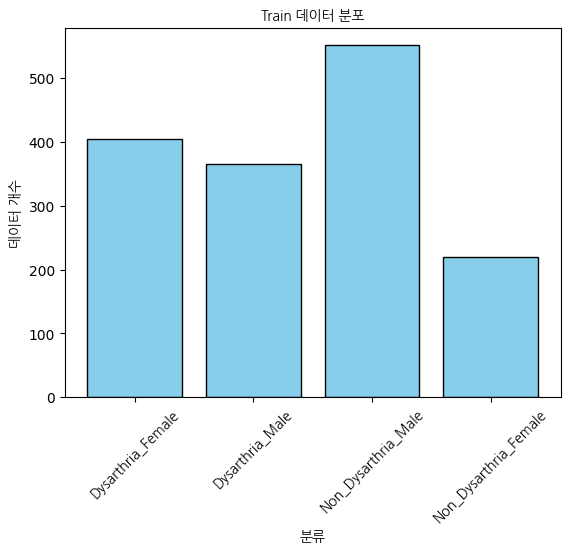

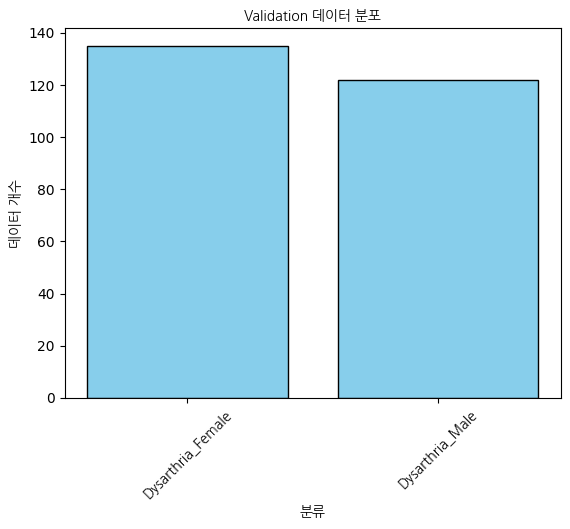

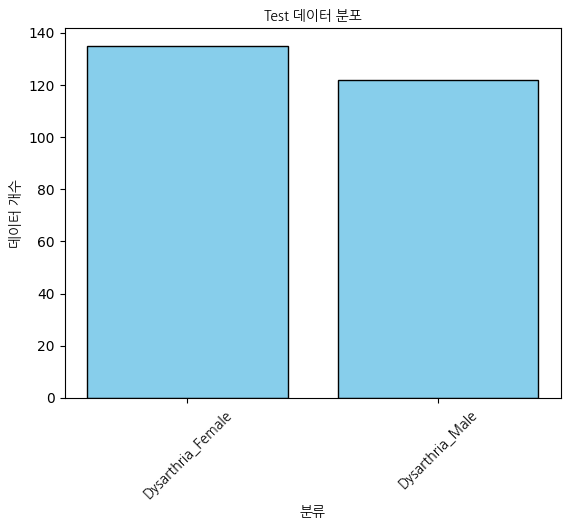

In [ ]:
import torch
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 글꼴 설치 및 설정
!apt-get update -qq
!apt-get install fonts-nanum -qq

font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams["font.family"] = font_prop.get_name()

# 저장된 데이터 로드
train_data = torch.load("train_data.pt")
test_data = torch.load("test_data.pt")
val_data = torch.load("val_data.pt")

# 분류별 데이터 개수 계산 함수
def count_categories(data):
    # dysarthria와 gender 조합으로 카운팅
    categories = [f"{item['dysarthria']}_{item['gender']}" for item in data]
    return Counter(categories)

# 데이터 개수 계산
train_counts = count_categories(train_data)
test_counts = count_categories(test_data)
val_counts = count_categories(val_data)

# 출력
print("Train 데이터 분류 정보:")
for category, count in train_counts.items():
    print(f"{category}: {count}개")

print("\nValidation 데이터 분류 정보:")
for category, count in val_counts.items():
    print(f"{category}: {count}개")

print("\nTest 데이터 분류 정보:")
for category, count in test_counts.items():
    print(f"{category}: {count}개")

# 시각화 함수
def plot_category_distribution(counts, title):
    categories = list(counts.keys())
    values = list(counts.values())

    plt.bar(categories, values, color='skyblue', edgecolor='black')
    plt.title(title, fontproperties=font_prop)
    plt.xlabel("분류", fontproperties=font_prop)
    plt.ylabel("데이터 개수", fontproperties=font_prop)
    plt.xticks(rotation=45, fontproperties=font_prop)
    plt.show()

# Train 데이터 시각화
plot_category_distribution(train_counts, "Train 데이터 분포")

# Validation 데이터 시각화
plot_category_distribution(val_counts, "Validation 데이터 분포")

# Test 데이터 시각화
plot_category_distribution(test_counts, "Test 데이터 분포")


In [ ]:
# import torch
# from collections import Counter
# import matplotlib.pyplot as plt
# import matplotlib.font_manager as fm

# # 한글 글꼴 설치 및 설정
# !apt-get update -qq
# !apt-get install fonts-nanum -qq

# font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
# font_prop = fm.FontProperties(fname=font_path)
# plt.rcParams["font.family"] = font_prop.get_name()

# # 저장된 데이터 로드
# train_data = torch.load("train_data.pt")
# test_data = torch.load("test_data.pt")
# val_data = torch.load("val_data.pt")

# # 분류별 데이터 개수 계산 함수
# def count_categories(data):
#     categories = [item["category"] for item in data]  # 각 데이터의 분류 가져오기
#     return Counter(categories)

# # 데이터 개수 계산
# train_counts = count_categories(train_data)
# test_counts = count_categories(test_data)
# val_counts = count_categories(val_data)

# # 출력
# print("Train 데이터 분류 정보:")
# for category, count in train_counts.items():
#     print(f"{category}: {count}개")

# print("\nValidation 데이터 분류 정보:")
# for category, count in val_counts.items():
#     print(f"{category}: {count}개")

# print("\nTest 데이터 분류 정보:")
# for category, count in test_counts.items():
#     print(f"{category}: {count}개")

# # 시각화
# def plot_category_distribution(counts, title):
#     categories = list(counts.keys())
#     values = list(counts.values())

#     plt.bar(categories, values, color='skyblue', edgecolor='black')
#     plt.title(title, fontproperties=font_prop)
#     plt.xlabel("분류", fontproperties=font_prop)
#     plt.ylabel("데이터 개수", fontproperties=font_prop)
#     plt.xticks(rotation=45, fontproperties=font_prop)
#     plt.show()

# # Train 데이터 시각화
# plot_category_distribution(train_counts, "Train 데이터 분포")

# plot_category_distribution(val_counts, "Validation 데이터 분포")
# # Test 데이터 시각화
# plot_category_distribution(test_counts, "Test 데이터 분포")

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


<ipython-input-22-1eccb3a86af5>:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  train_data = torch.load("train_data.pt")
<ipython-input-22-1eccb3a86af5>:16: FutureWarning:

KeyError: 'category'

# 기존 모델 성능 평가


In [ ]:
import torch
import torchaudio
from transformers import WhisperForConditionalGeneration, WhisperProcessor
from datasets import Dataset
from jiwer import wer

# Whisper 모델과 프로세서 로드
model_name = "openai/whisper-small"
processor = WhisperProcessor.from_pretrained(model_name)
model = WhisperForConditionalGeneration.from_pretrained(model_name, language='en')

# 오디오 데이터의 최대 길이 설정 (30초 길이의 16kHz 오디오)
MAX_AUDIO_LENGTH = 30 * 16000  # 30초 * 16000Hz

def preprocess_data(example):
    try:
        # 오디오 파일 로드
        waveform, sample_rate = torchaudio.load(example["audio"])
        if sample_rate != 16000:
            waveform = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=16000)(waveform)
        waveform = waveform.squeeze()

        # 오디오 길이가 MAX_AUDIO_LENGTH보다 길면 자르고, 짧으면 패딩
        if waveform.shape[0] > MAX_AUDIO_LENGTH:
            waveform = waveform[:MAX_AUDIO_LENGTH]
        else:
            padding_length = MAX_AUDIO_LENGTH - waveform.shape[0]
            waveform = torch.nn.functional.pad(waveform, (0, padding_length), "constant", 0)

        # 리스트를 텐서로 변환
        if isinstance(waveform, list):
            waveform = torch.tensor(waveform)

        # Whisper 모델에 필요한 입력 형식으로 변환
        inputs = processor(
            waveform.numpy(),
            sampling_rate=16000,
            return_tensors="pt",
            padding=True
        )
        example["input_features"] = inputs.input_features[0].to(torch.float32)  # 텐서로 변환 및 타입 설정

        # 텍스트 라벨 길이 제한 (최대 448 토큰)
        labels = processor.tokenizer(
            example["text"],
            return_tensors="pt",
            padding="max_length",
            truncation=True,
            max_length=448
        ).input_ids[0]
        example["labels"] = torch.tensor(labels)  # 리스트가 아닌 텐서로 설정

        return example
    except Exception as e:
        # 오류가 발생한 파일 경로와 오류 메시지를 출력
        print(f"오류 발생: {e} - 파일 건너뜁니다: {example['audio']}")
        return None

# 저장된 데이터셋 로드
test_data = torch.load("test_data.pt")

# None 값을 제거한 데이터셋 생성
def filter_none_values(data):
    return [item for item in data if item is not None]

# 데이터셋을 Datasets 라이브러리의 포맷으로 변환 및 전처리
eval_data_processed = [preprocess_data(item) for item in test_data]
eval_data_filtered = filter_none_values(eval_data_processed)
eval_dataset = Dataset.from_list(eval_data_filtered)

# 성능 평가 함수
def evaluate_model(model, processor, dataset):
    model.eval()
    total_wer = 0
    num_samples = len(dataset)

    with torch.no_grad():
        for example in dataset:
            try:
                # 모델 예측
                input_features = torch.tensor(example["input_features"]).unsqueeze(0)  # 배치 차원 추가 및 텐서로 변환
                generated_ids = model.generate(input_features)
                predicted_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

                # 실제 텍스트 라벨
                ground_truth_text = processor.decode(example["labels"], skip_special_tokens=True)

                # 디버깅 출력: 예측 텍스트와 실제 텍스트
                print(f"예측: {predicted_text}")
                print(f"실제: {ground_truth_text}")

                # WER 계산
                wer_score = wer(ground_truth_text, predicted_text)
                total_wer += wer_score
            except Exception as e:
                # 예측 중 오류 발생 시 출력
                print(f"예측 오류 발생: {e} - 파일 건너뜁니다")

    # 평균 WER 계산
    average_wer = total_wer / num_samples
    return average_wer

# 기존 모델 평가
original_wer = evaluate_model(model, processor, eval_dataset)
print(f"기존 모델 WER: {original_wer:.2f}")

ModuleNotFoundError: No module named 'datasets'

In [ ]:
# import torch
# import torchaudio
# from transformers import WhisperForConditionalGeneration, WhisperProcessor
# from datasets import Dataset
# from jiwer import wer

# # Whisper 모델과 프로세서 로드
# model_name = "openai/whisper-small"
# processor = WhisperProcessor.from_pretrained(model_name)
# model = WhisperForConditionalGeneration.from_pretrained(model_name)

# # 언어 설정 (영어)
# LANGUAGE = "en"  # ISO 639-1 언어 코드
# TASK = "transcribe"  # 가능한 옵션: "transcribe" 또는 "translate"

# # Forced decoder IDs 생성 및 설정
# forced_decoder_ids = processor.get_decoder_prompt_ids(language=LANGUAGE, task=TASK)
# model.config.forced_decoder_ids = forced_decoder_ids
# print(f"Forced decoder IDs 설정 완료: {forced_decoder_ids}")

# # 오디오 데이터의 최대 길이 설정 (30초 길이의 16kHz 오디오)
# MAX_AUDIO_LENGTH = 30 * 16000  # 30초 * 16000Hz

# def preprocess_data(example):
#     try:
#         # 오디오 파일 로드
#         waveform, sample_rate = torchaudio.load(example["audio"])
#         if sample_rate != 16000:
#             waveform = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=16000)(waveform)
#         waveform = waveform.squeeze()

#         # 오디오 길이가 MAX_AUDIO_LENGTH보다 길면 자르고, 짧으면 패딩
#         if waveform.shape[0] > MAX_AUDIO_LENGTH:
#             waveform = waveform[:MAX_AUDIO_LENGTH]
#         else:
#             padding_length = MAX_AUDIO_LENGTH - waveform.shape[0]
#             waveform = torch.nn.functional.pad(waveform, (0, padding_length), "constant", 0)

#         # 리스트를 텐서로 변환
#         if isinstance(waveform, list):
#             waveform = torch.tensor(waveform)

#         # Whisper 모델에 필요한 입력 형식으로 변환
#         inputs = processor(
#             waveform.numpy(),
#             sampling_rate=16000,
#             return_tensors="pt",
#             padding=True
#         )
#         example["input_features"] = inputs.input_features[0].to(torch.float32)  # 텐서로 변환 및 타입 설정

#         # 텍스트 라벨 길이 제한 (최대 448 토큰)
#         labels = processor.tokenizer(
#             example["text"],
#             return_tensors="pt",
#             padding="max_length",
#             truncation=True,
#             max_length=448
#         ).input_ids[0]
#         example["labels"] = torch.tensor(labels)  # 리스트가 아닌 텐서로 설정

#         return example
#     except Exception as e:
#         # 오류가 발생한 파일 경로와 오류 메시지를 출력
#         print(f"오류 발생: {e} - 파일 건너뜁니다: {example['audio']}")
#         return None

# # 저장된 데이터셋 로드
# test_data = torch.load("test_data.pt")

# # None 값을 제거한 데이터셋 생성
# def filter_none_values(data):
#     return [item for item in data if item is not None]

# # 데이터셋을 Datasets 라이브러리의 포맷으로 변환 및 전처리
# eval_data_processed = [preprocess_data(item) for item in test_data]
# eval_data_filtered = filter_none_values(eval_data_processed)
# eval_dataset = Dataset.from_list(eval_data_filtered)

# # 성능 평가 함수
# def evaluate_model(model, processor, dataset):
#     model.eval()
#     total_wer = 0
#     num_samples = len(dataset)

#     with torch.no_grad():
#         for example in dataset:
#             try:
#                 # 모델 예측
#                 input_features = torch.tensor(example["input_features"]).unsqueeze(0)  # 배치 차원 추가 및 텐서로 변환
#                 generated_ids = model.generate(input_features)
#                 predicted_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

#                 # 실제 텍스트 라벨
#                 ground_truth_text = processor.decode(example["labels"], skip_special_tokens=True)

#                 # 디버깅 출력: 예측 텍스트와 실제 텍스트
#                 print(f"예측: {predicted_text}")
#                 print(f"실제: {ground_truth_text}")

#                 # WER 계산
#                 wer_score = wer(ground_truth_text, predicted_text)
#                 total_wer += wer_score
#             except Exception as e:
#                 # 예측 중 오류 발생 시 출력
#                 print(f"예측 오류 발생: {e} - 파일 건너뜁니다")

#     # 평균 WER 계산
#     average_wer = total_wer / num_samples
#     return average_wer

# # 기존 모델 평가
# original_wer = evaluate_model(model, processor, eval_dataset)
# print(f"기존 모델 WER: {original_wer:.2f}")

Forced decoder IDs 설정 완료: [(1, 50259), (2, 50359), (3, 50363)]


<ipython-input-26-798226a46a2b>:69: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  test_data = torch.load("test_data.pt")
<ipython-input-26-798226a46a2b>:60: UserWarning: To 

예측:  Well, he is newly 93 years old.
실제: Well, he is nearly ninety three years old
예측:  Não! Não!
실제: no
예측:  고마워
실제: gnaw
예측:  Então...
실제: though
예측:  Tá bom.
실제: double
예측:  The little schoolhouse stood empty.
실제: The little schoolhouse stood empty.
예측:  Wank.
실제: rake
예측:  The box contains three sweaters.
실제: The box contained three sweaters.
예측:  16
실제: six
예측:  Wicked.
실제: wicked
예측: はい
실제: shoot


KeyboardInterrupt: 

# Finetuning

## Finetuning

##### Optuna

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.2 MB/s eta 0:00:00


In [ ]:
import torch
import torchaudio
from transformers import WhisperForConditionalGeneration, WhisperProcessor, TrainingArguments, Trainer
from datasets import Dataset

# Whisper 모델과 프로세서 로드
model_name = "openai/whisper-small"
processor = WhisperProcessor.from_pretrained(model_name)
model = WhisperForConditionalGeneration.from_pretrained(model_name)

MAX_AUDIO_LENGTH = 30 * 16000  # 30초 길이의 16kHz 오디오

def preprocess_data(example):
    try:
        waveform, sample_rate = torchaudio.load(example["audio"])
        if sample_rate != 16000:
            waveform = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=16000)(waveform)
        waveform = waveform.squeeze()

        if waveform.shape[0] > MAX_AUDIO_LENGTH:
            waveform = waveform[:MAX_AUDIO_LENGTH]
        else:
            padding_length = MAX_AUDIO_LENGTH - waveform.shape[0]
            waveform = torch.nn.functional.pad(waveform, (0, padding_length), "constant", 0)

        inputs = processor(
            waveform.numpy(),
            sampling_rate=16000,
            return_tensors="pt",
            padding=True
        )
        example["input_features"] = inputs.input_features[0]

        example["labels"] = processor.tokenizer(
            example["text"],
            return_tensors="pt",
            padding="max_length",
            truncation=True,
            max_length=448
        ).input_ids[0]

        return example
    except Exception as e:
        print(f"오류 발생: {e} - 파일 건너뜁니다: {example['audio']}")
        return None

def filter_none_values(data):
    return [item for item in data if item is not None]

# 저장된 데이터셋 로드
train_data = torch.load("train_data.pt")
val_data = torch.load("val_data.pt")

train_data_processed = [preprocess_data(item) for item in train_data]
train_data_filtered = filter_none_values(train_data_processed)
train_dataset = Dataset.from_list(train_data_filtered)

val_data_processed = [preprocess_data(item) for item in val_data]
val_data_filtered = filter_none_values(val_data_processed)
val_dataset = Dataset.from_list(val_data_filtered)

<ipython-input-28-36e64c4814f3>:51: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  train_data = torch.load("train_data.pt")
<ipython-input-28-36e64c4814f3>:52: FutureWarning:

In [ ]:
import optuna
from optuna.samplers import TPESampler
from optuna.pruners import HyperbandPruner
import logging

def objective(trial):
    # 하이퍼파라미터 샘플링
    learning_rate = trial.suggest_categorical("learning_rate", [1e-5, 1e-4, 1e-3])
    batch_size = trial.suggest_categorical("batch_size", [2, 4, 8])
    gradient_accumulation_steps = trial.suggest_categorical("gradient_accumulation_steps", [1, 2, 4])
    num_train_epochs = trial.suggest_int("num_train_epochs", 3, 5)
    lr_scheduler_type = trial.suggest_categorical("lr_scheduler_type", ["linear", "cosine"])
    warmup_steps = trial.suggest_int("warmup_steps", 100, 500)

    print(f"\n[Trial {trial.number}] Testing Parameters: {trial.params}")

    # 훈련 설정
    training_args = TrainingArguments(
        output_dir=f"/content/whisper-optuna-tuned-{trial.number}",
        per_device_train_batch_size=batch_size,
        gradient_accumulation_steps=gradient_accumulation_steps,
        evaluation_strategy="steps",
        num_train_epochs=num_train_epochs,
        fp16=True,
        save_steps=200,
        eval_steps=200,
        logging_steps=100,
        learning_rate=learning_rate,
        lr_scheduler_type=lr_scheduler_type,
        warmup_steps=warmup_steps,
        save_total_limit=2,
        load_best_model_at_end=True,
        report_to="none"
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        tokenizer=processor.feature_extractor,
    )

    # 모델 훈련
    trainer.train()

    # 평가 지표 계산 (validation loss 사용)
    eval_results = trainer.evaluate()

    # Pruning: Trial 중단
    trial.report(eval_results["eval_loss"], step=trainer.state.global_step)
    if trial.should_prune():
        raise optuna.exceptions.TrialPruned()

    return eval_results["eval_loss"]

# Optuna 스터디 생성 (TPE Sampler + Median Pruner 사용)
study = optuna.create_study(
    direction="minimize",
    sampler=TPESampler(),
    pruner=HyperbandPruner()
)

# 최적화 시작
study.optimize(objective, n_trials=10)

# 최적 하이퍼파라미터 출력
print("최적 하이퍼파라미터:", study.best_params)
print("최소 Validation Loss:", study.best_value)

[I 2024-11-30 07:27:28,652] A new study created in memory with name: no-name-d438538f-f0d8-42da-bec8-9ea0715d0953
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-29-b725ef2585c7>:36: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(



[Trial 0] Testing Parameters: {'learning_rate': 0.001, 'batch_size': 4, 'gradient_accumulation_steps': 1, 'num_train_epochs': 5, 'lr_scheduler_type': 'cosine', 'warmup_steps': 428}


Step,Training Loss,Validation Loss
200,0.167300,0.049936
400,0.055000,0.044072
600,0.054500,0.045135
800,0.047100,0.037909
1000,0.034300,0.031188
1200,0.029200,0.027950
1400,0.022600,0.023238
1600,0.017100,0.020730
1800,0.015600,0.020073


/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:2817: UserWarning: Moving the following attributes in the config to the generation config: {'max_length': 448, 'suppress_tokens': [1, 2, 7, 8, 9, 10, 14, 25, 26, 27, 28, 29, 31, 58, 59, 60, 61, 62, 63, 90, 91, 92, 93, 359, 503, 522, 542, 873, 893, 902, 918, 922, 931, 1350, 1853, 1982, 2460, 2627, 3246, 3253, 3268, 3536, 3846, 3961, 4183, 4667, 6585, 6647, 7273, 9061, 9383, 10428, 10929, 11938, 12033, 12331, 12562, 13793, 14157, 14635, 15265, 15618, 16553, 16604, 18362, 18956, 20075, 21675, 22520, 26130, 26161, 26435, 28279, 29464, 31650, 32302, 32470, 36865, 42863, 47425, 49870, 50254, 50258, 50360, 50361, 50362], 'begin_suppress_tokens': [220, 50257]}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(
There were missing keys in the checkpoint model loaded: ['proj_out.weight'].


[I 2024-11-30 07:51:27,574] Trial 0 finished with value: 0.02007315307855606 and parameters: {'learning_rate': 0.001, 'batch_size': 4, 'gradient_accumulation_steps': 1, 'num_train_epochs': 5, 'lr_scheduler_type': 'cosine', 'warmup_steps': 428}. Best is trial 0 with value: 0.02007315307855606.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-29-b725ef2585c7>:36: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(



[Trial 1] Testing Parameters: {'learning_rate': 0.001, 'batch_size': 8, 'gradient_accumulation_steps': 1, 'num_train_epochs': 3, 'lr_scheduler_type': 'cosine', 'warmup_steps': 381}


Step,Training Loss,Validation Loss
200,0.023200,0.027839
400,0.028500,0.030487


There were missing keys in the checkpoint model loaded: ['proj_out.weight'].


[I 2024-11-30 08:03:18,037] Trial 1 finished with value: 0.02783949486911297 and parameters: {'learning_rate': 0.001, 'batch_size': 8, 'gradient_accumulation_steps': 1, 'num_train_epochs': 3, 'lr_scheduler_type': 'cosine', 'warmup_steps': 381}. Best is trial 0 with value: 0.02007315307855606.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-29-b725ef2585c7>:36: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(



[Trial 2] Testing Parameters: {'learning_rate': 0.001, 'batch_size': 8, 'gradient_accumulation_steps': 2, 'num_train_epochs': 5, 'lr_scheduler_type': 'cosine', 'warmup_steps': 276}


Step,Training Loss,Validation Loss
200,0.018700,0.025731
400,0.019300,0.021434


There were missing keys in the checkpoint model loaded: ['proj_out.weight'].


[I 2024-11-30 08:21:45,231] Trial 2 finished with value: 0.021434152498841286 and parameters: {'learning_rate': 0.001, 'batch_size': 8, 'gradient_accumulation_steps': 2, 'num_train_epochs': 5, 'lr_scheduler_type': 'cosine', 'warmup_steps': 276}. Best is trial 0 with value: 0.02007315307855606.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-29-b725ef2585c7>:36: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(



[Trial 3] Testing Parameters: {'learning_rate': 0.0001, 'batch_size': 8, 'gradient_accumulation_steps': 2, 'num_train_epochs': 4, 'lr_scheduler_type': 'linear', 'warmup_steps': 139}


Step,Training Loss,Validation Loss
200,0.012800,0.019638


There were missing keys in the checkpoint model loaded: ['proj_out.weight'].


[I 2024-11-30 08:36:31,435] Trial 3 finished with value: 0.019638005644083023 and parameters: {'learning_rate': 0.0001, 'batch_size': 8, 'gradient_accumulation_steps': 2, 'num_train_epochs': 4, 'lr_scheduler_type': 'linear', 'warmup_steps': 139}. Best is trial 3 with value: 0.019638005644083023.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-29-b725ef2585c7>:36: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(



[Trial 4] Testing Parameters: {'learning_rate': 0.0001, 'batch_size': 8, 'gradient_accumulation_steps': 4, 'num_train_epochs': 5, 'lr_scheduler_type': 'linear', 'warmup_steps': 288}


Step,Training Loss,Validation Loss
200,0.011500,0.020471


There were missing keys in the checkpoint model loaded: ['proj_out.weight'].


[I 2024-11-30 08:54:28,737] Trial 4 finished with value: 0.02047140710055828 and parameters: {'learning_rate': 0.0001, 'batch_size': 8, 'gradient_accumulation_steps': 4, 'num_train_epochs': 5, 'lr_scheduler_type': 'linear', 'warmup_steps': 288}. Best is trial 3 with value: 0.019638005644083023.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-29-b725ef2585c7>:36: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(



[Trial 5] Testing Parameters: {'learning_rate': 1e-05, 'batch_size': 2, 'gradient_accumulation_steps': 2, 'num_train_epochs': 5, 'lr_scheduler_type': 'cosine', 'warmup_steps': 272}


Step,Training Loss,Validation Loss
200,0.011100,0.020302
400,0.011100,0.020472
600,0.010900,0.020604
800,0.011000,0.020612
1000,0.010900,0.020791
1200,0.010900,0.020740
1400,0.010600,0.020785
1600,0.010200,0.020819
1800,0.010600,0.020837


There were missing keys in the checkpoint model loaded: ['proj_out.weight'].


[I 2024-11-30 09:22:06,759] Trial 5 finished with value: 0.020301859825849533 and parameters: {'learning_rate': 1e-05, 'batch_size': 2, 'gradient_accumulation_steps': 2, 'num_train_epochs': 5, 'lr_scheduler_type': 'cosine', 'warmup_steps': 272}. Best is trial 3 with value: 0.019638005644083023.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-29-b725ef2585c7>:36: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(



[Trial 6] Testing Parameters: {'learning_rate': 0.001, 'batch_size': 4, 'gradient_accumulation_steps': 4, 'num_train_epochs': 5, 'lr_scheduler_type': 'linear', 'warmup_steps': 273}


Step,Training Loss,Validation Loss
200,0.017200,0.024444
400,0.016100,0.020655


There were missing keys in the checkpoint model loaded: ['proj_out.weight'].


[I 2024-11-30 09:42:00,875] Trial 6 pruned. 
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-29-b725ef2585c7>:36: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(



[Trial 7] Testing Parameters: {'learning_rate': 0.0001, 'batch_size': 2, 'gradient_accumulation_steps': 2, 'num_train_epochs': 5, 'lr_scheduler_type': 'cosine', 'warmup_steps': 299}


Step,Training Loss,Validation Loss
200,0.012300,0.020021
400,0.012900,0.019947
600,0.012100,0.020163
800,0.011900,0.019970
1000,0.011500,0.020190
1200,0.011100,0.020402
1400,0.010500,0.020177
1600,0.009900,0.020150
1800,0.009900,0.020211


There were missing keys in the checkpoint model loaded: ['proj_out.weight'].


[I 2024-11-30 10:09:50,016] Trial 7 finished with value: 0.01994655467569828 and parameters: {'learning_rate': 0.0001, 'batch_size': 2, 'gradient_accumulation_steps': 2, 'num_train_epochs': 5, 'lr_scheduler_type': 'cosine', 'warmup_steps': 299}. Best is trial 3 with value: 0.019638005644083023.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-29-b725ef2585c7>:36: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(



[Trial 8] Testing Parameters: {'learning_rate': 0.001, 'batch_size': 8, 'gradient_accumulation_steps': 4, 'num_train_epochs': 5, 'lr_scheduler_type': 'cosine', 'warmup_steps': 203}


Step,Training Loss,Validation Loss
200,0.014900,0.023296


There were missing keys in the checkpoint model loaded: ['proj_out.weight'].


[I 2024-11-30 10:28:03,246] Trial 8 pruned. 
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-29-b725ef2585c7>:36: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(



[Trial 9] Testing Parameters: {'learning_rate': 0.001, 'batch_size': 2, 'gradient_accumulation_steps': 2, 'num_train_epochs': 5, 'lr_scheduler_type': 'cosine', 'warmup_steps': 268}


Step,Training Loss,Validation Loss
200,0.018600,0.026581
400,0.034400,0.032260
600,0.025500,0.027499
800,0.022400,0.024783
1000,0.017300,0.022673
1200,0.015300,0.020659
1400,0.012900,0.019827
1600,0.011300,0.019694
1800,0.011000,0.019475


There were missing keys in the checkpoint model loaded: ['proj_out.weight'].


[I 2024-11-30 10:56:01,732] Trial 9 finished with value: 0.019475046545267105 and parameters: {'learning_rate': 0.001, 'batch_size': 2, 'gradient_accumulation_steps': 2, 'num_train_epochs': 5, 'lr_scheduler_type': 'cosine', 'warmup_steps': 268}. Best is trial 9 with value: 0.019475046545267105.


최적 하이퍼파라미터: {'learning_rate': 0.001, 'batch_size': 2, 'gradient_accumulation_steps': 2, 'num_train_epochs': 5, 'lr_scheduler_type': 'cosine', 'warmup_steps': 268}
최소 Validation Loss: 0.019475046545267105


LoRA 용

In [ ]:
import optuna
from optuna.samplers import TPESampler
from optuna.pruners import HyperbandPruner
import logging

def objective(trial):
    rank = trial.suggest_categorical("r", [4, 8, 16])
    lora_alpha = trial.suggest_categorical("lora_alpha", [16, 32])
    lora_dropout = trial.suggest_categorical("lora_dropout", [0.1, 0.2])
    bias = trial.suggest_categorical("bias", ["none", "lora_only"])

    # LoRA 구성 설정
    lora_config = LoraConfig(
        r=rank,
        lora_alpha=lora_alpha,
        target_modules=["q_proj", "v_proj"],  # LoRA 적용 모듈
        lora_dropout=lora_dropout,
        bias=bias,
        task_type="SEQ_2_SEQ_LM"
    )
    # # 하이퍼파라미터 샘플링
    # learning_rate = trial.suggest_categorical("learning_rate", [1e-4, 1e-3])
    # batch_size = trial.suggest_categorical("batch_size", [4, 8])
    # gradient_accumulation_steps = trial.suggest_categorical("gradient_accumulation_steps", [1, 2, 4])
    # num_train_epochs = trial.suggest_int("num_train_epochs", 3, 7)
    # lr_scheduler_type = trial.suggest_categorical("lr_scheduler_type", ["linear", "cosine"])
    # warmup_steps = trial.suggest_int("warmup_steps", 100, 500)

    print(f"\n[Trial {trial.number}] Testing Parameters: {trial.params}")

    # 훈련 설정
    training_args = TrainingArguments(
        output_dir=f"/content/whisper-optuna-tuned-{trial.number}",
        per_device_train_batch_size=4,
        gradient_accumulation_steps=4,
        evaluation_strategy="steps",
        num_train_epochs=5,
        fp16=True,
        save_steps=200,
        eval_steps=200,
        logging_steps=100,
        learning_rate=1e-4,
        lr_scheduler_type="cosine",
        warmup_steps=500,
        save_total_limit=2,
        load_best_model_at_end=True,
        report_to="none"
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        tokenizer=processor.feature_extractor,
    )

    # 모델 훈련
    trainer.train()

    # 평가 지표 계산 (validation loss 사용)
    eval_results = trainer.evaluate()

    # Pruning: Trial 중단
    trial.report(eval_results["eval_loss"], step=trainer.state.global_step)
    if trial.should_prune():
        raise optuna.exceptions.TrialPruned()

    return eval_results["eval_loss"]

# Optuna 스터디 생성 (TPE Sampler + Median Pruner 사용)
study = optuna.create_study(
    direction="minimize",
    sampler=TPESampler(),
    pruner=HyperbandPruner()
)

# 최적화 시작
study.optimize(objective, n_trials=10)

# 최적 하이퍼파라미터 출력
print("최적 하이퍼파라미터:", study.best_params)
print("최소 Validation Loss:", study.best_value)

In [ ]:
# 최적 하이퍼파라미터로 모델 훈련
best_params = study.best_params
training_args = TrainingArguments(
    output_dir="/content/whisper-optuna-final",
    per_device_train_batch_size=best_params["batch_size"],
    gradient_accumulation_steps=best_params["gradient_accumulation_steps"],
    evaluation_strategy="steps",
    num_train_epochs=best_params["num_train_epochs"],
    fp16=True,
    save_steps=200,
    eval_steps=200,
    logging_steps=100,
    learning_rate=best_params["learning_rate"],
    warmup_steps=500,
    save_total_limit=2,
    load_best_model_at_end=True,
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=processor.feature_extractor,
)

trainer.train()
trainer.save_model("/content/whisper-optuna-final")
print("Whisper 모델의 최적화된 파인 튜닝이 완료되었습니다.")

##### 기본 파인튜닝

In [ ]:
import torch
import torchaudio
from transformers import WhisperForConditionalGeneration, WhisperProcessor, TrainingArguments, Trainer
from datasets import Dataset

# Whisper 모델과 프로세서 로드
model_name = "openai/whisper-small"
processor = WhisperProcessor.from_pretrained(model_name)
model = WhisperForConditionalGeneration.from_pretrained(model_name)

# 오디오 데이터의 최대 길이 설정 (30초 길이의 16kHz 오디오)
MAX_AUDIO_LENGTH = 30 * 16000  # 30초 * 16000Hz

def preprocess_data(example):
    try:
        # 오디오 파일 로드
        waveform, sample_rate = torchaudio.load(example["audio"])
        if sample_rate != 16000:
            waveform = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=16000)(waveform)
        waveform = waveform.squeeze()

        # 오디오 길이가 MAX_AUDIO_LENGTH보다 길면 자르고, 짧으면 패딩
        if waveform.shape[0] > MAX_AUDIO_LENGTH:
            waveform = waveform[:MAX_AUDIO_LENGTH]
        else:
            padding_length = MAX_AUDIO_LENGTH - waveform.shape[0]
            waveform = torch.nn.functional.pad(waveform, (0, padding_length), "constant", 0)

        # Whisper 모델에 필요한 입력 형식으로 변환
        inputs = processor(
            waveform.numpy(),
            sampling_rate=16000,
            return_tensors="pt",
            padding=True
        )
        example["input_features"] = inputs.input_features[0]

        # 텍스트 라벨 길이 제한 (최대 448 토큰)
        example["labels"] = processor.tokenizer(
            example["text"],
            return_tensors="pt",
            padding="max_length",
            truncation=True,
            max_length=448
        ).input_ids[0]

        return example
    except Exception as e:
        # 오류가 발생한 파일을 출력하고 건너뜁니다
        print(f"오류 발생: {e} - 파일 건너뜁니다: {example['audio']}")
        return None

# 저장된 데이터셋 로드
train_data = torch.load("train_data.pt")
val_data = torch.load("val_data.pt")
test_data = torch.load("test_data.pt")

# None 값을 제거한 데이터셋 생성
def filter_none_values(data):
    filtered_data = [item for item in data if item is not None]
    return filtered_data

train_data_processed = [preprocess_data(item) for item in train_data]
train_data_filtered = filter_none_values(train_data_processed)
train_dataset = Dataset.from_list(train_data_filtered)

val_data_processed = [preprocess_data(item) for item in val_data]
val_data_filtered = filter_none_values(val_data_processed)
val_dataset = Dataset.from_list(val_data_filtered)

# 훈련 설정
training_args = TrainingArguments(
    output_dir="/content/whisper-finetuned",
    per_device_train_batch_size=4,
    gradient_accumulation_steps=4,
    evaluation_strategy="steps",
    num_train_epochs=5,
    fp16=True,
    save_steps=200,
    eval_steps=200,
    logging_steps=100,
    learning_rate=1e-4,
    warmup_steps=500,
    save_total_limit=2,
    load_best_model_at_end=True,
    report_to="none"
)

# 트레이너 설정
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=processor.feature_extractor,
)

# 모델 훈련
trainer.train()
trainer.save_model("/content/whisper-finetuned")
print("Whisper 모델의 파인 튜닝이 완료되었습니다.")

<ipython-input-10-8a368bcbcc2f>:54: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  train_data = torch.load("train_data.pt")
<ipython-input-10-8a368bcbcc2f>:55: FutureWarning:

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
frame #15: <unknown function> + 0x194f64 (0x583499dc6f64 in /usr/bin/python3)
frame #16: _PyObject_MakeTpCall + 0x1fc (0x583499db3aec in /usr/bin/python3)
frame #17: _PyEval_EvalFrameDefault + 0x61f8 (0x583499dad4c8 in /usr/bin/python3)
frame #18: _PyFunction_Vectorcall + 0x7c (0x583499dbdaec in /usr/bin/python3)
frame #19: _PyEval_EvalFrameDefault + 0x6d2 (0x583499da79a2 in /usr/bin/python3)
frame #20: _PyFunction_Vectorcall + 0x7c (0x583499dbdaec in /usr/bin/python3)
frame #21: _PyEval_EvalFrameDefault + 0x58aa (0x583499dacb7a in /usr/bin/python3)
frame #22: _PyFunction_Vectorcall + 0x7c (0x583499dbdaec in /usr/bin/python3)
frame #23: _PyEval_EvalFrameDefault + 0x58aa (0x583499dacb7a in /usr/bin/python3)
frame #24: _PyFunction_Vectorcall + 0x7c (0x583499dbdaec in /usr/bin/python3)
frame #25: _PyEval_EvalFrameDefault + 0x6d2 (0x583499da79a2 in /usr/bin/python3)
frame #26: _PyFunction_Vectorcall + 0x7c (0x583499dbdaec in /usr/bin/python3)
frame #27: 

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-10-8a368bcbcc2f>:93: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


ValueError: No columns in the dataset match the model's forward method signature. The following columns have been ignored: []. Please check the dataset and model. You may need to set `remove_unused_columns=False` in `TrainingArguments`.

##### Evaluation

In [ ]:
import torch
import torchaudio
from transformers import WhisperProcessor, WhisperForConditionalGeneration
from jiwer import wer

# 커스텀 WER 계산 함수
def custom_wer(reference, hypothesis):
    """
    긴 예측 오류 또는 빈 예측 오류를 WER=1로 설정.
    """
    if not hypothesis or len(hypothesis.split()) > 2 * len(reference.split()):
        return 1.0  # WER = 1로 처리
    else:
        return wer(reference, hypothesis)

# 모델과 프로세서 로드
processor = WhisperProcessor.from_pretrained("openai/whisper-small")
finetuned_model = WhisperForConditionalGeneration.from_pretrained("/content/whisper-finetuned")

# 성능 평가 함수
def evaluate_model(model, processor, dataset):
    model.eval()
    total_wer = 0
    num_samples = len(dataset)

    comparisons = []

    with torch.no_grad():
        for example in dataset:
            try:
                # 오디오 파일 로드 및 전처리
                waveform, sample_rate = torchaudio.load(example["audio"])
                if sample_rate != 16000:
                    waveform = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=16000)(waveform)

                # 입력 생성
                inputs = processor(waveform.squeeze().numpy(), sampling_rate=16000, return_tensors="pt")
                generated_ids = model.generate(inputs.input_features)
                predicted_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

                # 실제 텍스트
                ground_truth_text = processor.decode(example["labels"], skip_special_tokens=True)

                # 예측 및 실제 텍스트 저장
                comparisons.append((predicted_text, ground_truth_text))

                # WER 계산
                wer_score = custom_wer(ground_truth_text, predicted_text)
                total_wer += wer_score
            except Exception as e:
                print(f"파일 처리 중 오류 발생: {example['audio']} - 오류: {e}")
                continue

    average_wer = total_wer / num_samples

    # 예측과 실제 텍스트 출력
    for idx, (predicted, actual) in enumerate(comparisons):
        print(f"예측: {predicted}\n실제: {actual}\n")

    return average_wer

test_data = torch.load("test_data.pt")
test_data_processed = [preprocess_data(item) for item in test_data]
test_data_filtered = filter_none_values(test_data_processed)
test_dataset = Dataset.from_list(test_data_filtered)

finetuned_wer = evaluate_model(finetuned_model, processor, test_dataset)
print(f"파인 튜닝된 모델 WER: {finetuned_wer:.2f}")

<ipython-input-3-75057927ca0f>:62: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  test_data = torch.load("test_data.pt")


NameError: name 'eval_dataset' is not defined

## LoRA Finetuning

In [ ]:
!pip install --upgrade peft

In [ ]:
import torch
import torchaudio
from transformers import WhisperForConditionalGeneration, WhisperProcessor, TrainingArguments, Trainer
from datasets import Dataset
from peft import LoraConfig, get_peft_model

# LoRA 구성 설정
lora_config = LoraConfig(
    r=16,
    lora_alpha=32,
    target_modules=["q_proj", "v_proj"],  # LoRA 적용 모듈
    lora_dropout=0.1,
    bias="none",
    task_type="SEQ_2_SEQ_LM"
)

# Whisper 모델과 프로세서 로드
model_name = "openai/whisper-small"
processor = WhisperProcessor.from_pretrained(model_name)
model = WhisperForConditionalGeneration.from_pretrained(model_name)

# LoRA 적용
try:
    model = get_peft_model(model, lora_config)
except ValueError as e:
    print(f"LoRA 설정 중 에러 발생: {e}")

# 모델의 forward 메서드 재정의
class ModifiedWhisperModel(WhisperForConditionalGeneration):
    def forward(self, input_features, labels=None):
        return super().forward(input_features=input_features, labels=labels)

model = ModifiedWhisperModel.from_pretrained("openai/whisper-small")

# 최대 오디오 길이 설정
MAX_AUDIO_LENGTH = 30 * 16000  # 30초

def preprocess_data(example):
    try:
        waveform, sample_rate = torchaudio.load(example["audio"])
        if sample_rate != 16000:
            waveform = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=16000)(waveform)
        waveform = waveform.squeeze()
        # 패딩 또는 자르기
        if waveform.shape[0] > MAX_AUDIO_LENGTH:
            waveform = waveform[:MAX_AUDIO_LENGTH]
        else:
            padding_length = MAX_AUDIO_LENGTH - waveform.shape[0]
            waveform = torch.nn.functional.pad(waveform, (0, padding_length), "constant", 0)

        inputs = processor(waveform.numpy(), sampling_rate=16000, return_tensors="pt", padding=True)
        example["input_features"] = inputs.input_features[0]
        example["labels"] = processor.tokenizer(
            example["text"],
            return_tensors="pt",
            padding="max_length",
            truncation=True,
            max_length=448
        ).input_ids[0]
        return example
    except Exception as e:
        print(f"오류 발생: {e} - 파일 건너뜁니다: {example['audio']}")
        return None

# Data Collator
def data_collator(batch):
    input_features = torch.cat([torch.tensor(item["input_features"]).unsqueeze(0) for item in batch], dim=0)
    labels = torch.cat([torch.tensor(item["labels"]).unsqueeze(0) for item in batch], dim=0)
    return {"input_features": input_features, "labels": labels}

# 저장된 데이터셋 로드
train_data = torch.load("train_data.pt")
val_data = torch.load("val_data.pt")
test_data = torch.load("test_data.pt")

# None 값을 제거한 데이터셋 생성
def filter_none_values(data):
    return [item for item in data if item is not None]

# 데이터셋을 Datasets 라이브러리의 포맷으로 변환 및 전처리
train_data_processed = [preprocess_data(item) for item in train_data]
train_data_filtered = filter_none_values(train_data_processed)
train_dataset = Dataset.from_list(train_data_filtered)

val_data_processed = [preprocess_data(item) for item in val_data]
val_data_filtered = filter_none_values(val_data_processed)
val_dataset = Dataset.from_list(val_data_filtered)

# 훈련 설정
training_args = TrainingArguments(
    output_dir="/content/whisper-lora-finetuned",
    per_device_train_batch_size=4,
    gradient_accumulation_steps=4,
    evaluation_strategy="steps",
    num_train_epochs=5,
    fp16=True,
    save_steps=200,
    eval_steps=200,
    logging_steps=100,
    learning_rate=1e-4,
    warmup_steps=500,
    save_total_limit=2,
    load_best_model_at_end=True,
    report_to="none",
)

# 트레이너 설정
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=processor.feature_extractor,
)

# 모델 훈련
trainer.train()
trainer.save_model("/content/whisper-lora-finetuned")
print("Whisper 모델의 LoRA 기반 파인 튜닝이 완료되었습니다.")

<ipython-input-11-1c5b6454c039>:72: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  train_data = torch.load("train_data.pt")
<ipython-input-11-1c5b6454c039>:73: FutureWarning:

Step,Training Loss,Validation Loss
200,0.001500,0.006518


/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:2817: UserWarning: Moving the following attributes in the config to the generation config: {'max_length': 448, 'suppress_tokens': [1, 2, 7, 8, 9, 10, 14, 25, 26, 27, 28, 29, 31, 58, 59, 60, 61, 62, 63, 90, 91, 92, 93, 359, 503, 522, 542, 873, 893, 902, 918, 922, 931, 1350, 1853, 1982, 2460, 2627, 3246, 3253, 3268, 3536, 3846, 3961, 4183, 4667, 6585, 6647, 7273, 9061, 9383, 10428, 10929, 11938, 12033, 12331, 12562, 13793, 14157, 14635, 15265, 15618, 16553, 16604, 18362, 18956, 20075, 21675, 22520, 26130, 26161, 26435, 28279, 29464, 31650, 32302, 32470, 36865, 42863, 47425, 49870, 50254, 50258, 50360, 50361, 50362], 'begin_suppress_tokens': [220, 50257]}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(
There were missing keys in the checkpoint model loaded: ['proj_out.weight'].


Whisper 모델의 LoRA 기반 파인 튜닝이 완료되었습니다.


In [ ]:
import shutil

# 모델 저장 경로 압축
model_save_path = "/content/whisper-lora-finetuned"
zip_file_path = "/content/whisper-lora-finetuned.zip"

try:
    shutil.make_archive(base_name=zip_file_path.replace(".zip", ""), format="zip", root_dir=model_save_path)
    print(f"모델 경로가 압축되었습니다: {zip_file_path}")
except Exception as e:
    print(f"압축 중 오류 발생: {e}")


모델 경로가 압축되었습니다: /content/whisper-lora-finetuned.zip


In [ ]:
import torch
import torchaudio
from transformers import WhisperProcessor, WhisperForConditionalGeneration
from jiwer import wer

# 커스텀 WER 계산 함수
def custom_wer(reference, hypothesis):
    """
    긴 예측 오류 또는 빈 예측 오류를 WER=1로 설정.
    """
    if not hypothesis or len(hypothesis.split()) > 2 * len(reference.split()):
        return 1.0  # WER = 1로 처리
    else:
        return wer(reference, hypothesis)

# 모델과 프로세서 로드
processor = WhisperProcessor.from_pretrained("openai/whisper-small")
lora_finetuned_model = WhisperForConditionalGeneration.from_pretrained("/content/whisper-lora-finetuned")

# 성능 평가 함수
def evaluate_model(model, processor, dataset):
    model.eval()
    total_wer = 0
    num_samples = len(dataset)

    comparisons = []

    with torch.no_grad():
        for example in dataset:
            try:
                # 오디오 파일 로드 및 전처리
                waveform, sample_rate = torchaudio.load(example["audio"])
                if sample_rate != 16000:
                    waveform = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=16000)(waveform)

                # 입력 생성
                inputs = processor(
                    waveform.squeeze().numpy(),
                    sampling_rate=16000,
                    return_tensors="pt",
                    return_attention_mask=True
                    )
                generated_ids = model.generate(inputs.input_features)
                predicted_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

                # 실제 텍스트
                ground_truth_text = processor.decode(example["labels"], skip_special_tokens=True)

                # 예측 및 실제 텍스트 저장
                comparisons.append((predicted_text, ground_truth_text))

                # WER 계산
                wer_score = custom_wer(ground_truth_text, predicted_text)
                total_wer += wer_score
            except Exception as e:
                print(f"파일 처리 중 오류 발생: {example['audio']} - 오류: {e}")
                continue

    average_wer = total_wer / num_samples

    # 예측과 실제 텍스트 출력
    for idx, (predicted, actual) in enumerate(comparisons):
        print(f"예측: {predicted}\n실제: {actual}\n")

    return average_wer

test_data = torch.load("test_data.pt")
test_data_processed = [preprocess_data(item) for item in test_data]
test_data_filtered = filter_none_values(test_data_processed)
test_dataset = Dataset.from_list(test_data_filtered)

finetuned_wer = evaluate_model(lora_finetuned_model, processor, test_dataset)
print(f"파인 튜닝된 모델 WER: {finetuned_wer:.2f}")

<ipython-input-13-cf6c4236fcc4>:67: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  test_data = torch.load("test_data.pt")
Due to a bug fix in https://github.com/huggingface/t

예측:  ಸಿಸಿ
실제: sing

예측:  She doesn't like it to have it hanging around.
실제: She doesn't like to have it hanging around.

예측:  new
실제: knew

예측:  ಸಿರಿ
실제: cart

예측:  He asked him for a loan.
실제: He asked you for a loan.

예측: fill
실제: fill

예측: droop
실제: droop

예측: bug
실제: bug

예측: sip
실제: sip

예측: shear
실제: here

예측:  ಸಿರಿ
실제: coupe

예측:  pier
실제: peer

예측:  ಸಿರಿ
실제: sigh

예측:  ಸಿಕಿ
실제: Most young rise early every morning.

예측:  ಸಿರಿ
실제: rock

예측:  ಸಿರಿ
실제: nut

예측:  ಸಿರಿ
실제: rave

예측:  ಸಿರಿ
실제: papa

예측: sitting
실제: sitting

예측:  ಸಿರಿ
실제: down

예측:  ಕಿಕಿ
실제: eight

예측: fair
실제: feed

예측:  Twice each day he played skillfully and with zest upon our small organ.
실제: Twice each day he plays skillfully and with zest upon our small organ.

예측: meat
실제: meat

예측:  To dolphins swam around the boat
실제: The dolphins swam around our boat.

예측:  ಸಿರಿ
실제: barn

예측:  the
실제: the

예측: wit
실제: wit

예측:  ಕಿಕಿ
실제: fork

예측:  The box contained three sweaters.
실제: The box contained three sweaters.

예측:  s

LoRA 코드를 다시 짜보자

In [ ]:
from transformers import WhisperFeatureExtractor
from transformers import WhisperTokenizer
from transformers import WhisperProcessor

model_name = "openai/whisper-small"

feature_extractor = WhisperFeatureExtractor.from_pretrained(model_name)
tokenizer = WhisperTokenizer.from_pretrained(model_name, language=language, task=task)
processor = WhisperProcessor.from_pretrained(model_name, language=language, task=task)


# Overfitting

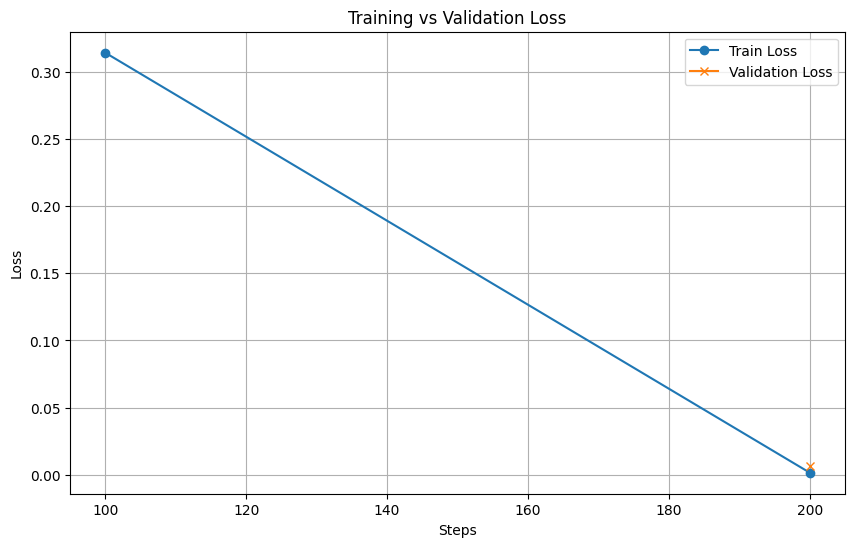

In [ ]:
import matplotlib.pyplot as plt

# 트레이너의 로그에서 손실 값 가져오기
train_loss = trainer.state.log_history
train_loss_steps = [log["step"] for log in train_loss if "loss" in log]
train_loss_values = [log["loss"] for log in train_loss if "loss" in log]

eval_loss_steps = [log["step"] for log in train_loss if "eval_loss" in log]
eval_loss_values = [log["eval_loss"] for log in train_loss if "eval_loss" in log]

# 학습 및 검증 손실 시각화
plt.figure(figsize=(10, 6))
plt.plot(train_loss_steps, train_loss_values, label="Train Loss", marker="o")
plt.plot(eval_loss_steps, eval_loss_values, label="Validation Loss", marker="x")
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.show()


# CV Fold

In [ ]:
# 캐시 정리
import gc
gc.collect()

# GPU 메모리 초기화 (필요한 경우)
import torch
torch.cuda.empty_cache()

In [ ]:
import os
import torch
import torchaudio
from sklearn.model_selection import StratifiedKFold
from transformers import WhisperForConditionalGeneration, WhisperProcessor, TrainingArguments, Trainer
from datasets import Dataset
from peft import LoraConfig, get_peft_model
import numpy as np
from transformers import EvalPrediction

# compute_metrics 함수 정의
def compute_metrics(pred: EvalPrediction):
    preds = pred.predictions
    labels = pred.label_ids

    # Loss 계산은 이미 Trainer 내부에서 수행되므로 다른 평가 지표를 추가적으로 계산할 수 있습니다.
    # 예: 정확도 계산 (optional)
    from datasets import load_metric
    metric = load_metric("wer")  # Word Error Rate 계산
    decoded_preds = processor.batch_decode(preds, skip_special_tokens=True)
    decoded_labels = processor.batch_decode(labels, skip_special_tokens=True)

    # WER 계산
    wer = metric.compute(predictions=decoded_preds, references=decoded_labels)
    return {"wer": wer}

# 데이터 로드 함수 (이전과 동일)
def load_data(directory):
    data = []
    for root, _, files in os.walk(directory):
        parts = root.split("/")
        if len(parts) <= 5:
            continue
        target = parts[5]
        if "Wav" in root:
            for file in files:
                if file.endswith(".wav"):
                    audio_path = os.path.join(root, file)
                    text_path = audio_path.replace("Wav", "Txt").replace(".wav", ".txt")
                    if os.path.exists(text_path):
                        with open(text_path, "r", encoding="utf-8") as f:
                            text = f.read().strip()
                        data.append({"audio": audio_path, "text": text, "category": target})
    return data

# 데이터 로드
data_directory = "/content/dataset/Dysarthria and Non Dysarthria/Dataset"
data = load_data(data_directory)

# 데이터와 레이블 분리
audio_data = np.array(data)
labels = np.array([item["category"] for item in data])

# LoRA 구성 설정
lora_config = LoraConfig(
    r=16,
    lora_alpha=32,
    target_modules=["q_proj", "v_proj"],  # LoRA 적용 모듈
    lora_dropout=0.1,
    bias="none",
    # task_type="SEQ_2_SEQ_LM"
)

# Whisper 모델과 프로세서 로드
model_name = "openai/whisper-small"
processor = WhisperProcessor.from_pretrained(model_name)
model = WhisperForConditionalGeneration.from_pretrained(model_name)

# LoRA 적용
try:
    model = get_peft_model(model, lora_config)
except ValueError as e:
    print(f"LoRA 설정 중 에러 발생: {e}")

# 모델의 forward 메서드 재정의
class ModifiedWhisperModel(WhisperForConditionalGeneration):
    def forward(self, input_features, labels=None):
        return super().forward(input_features=input_features, labels=labels)

model = ModifiedWhisperModel.from_pretrained("openai/whisper-small")

# 최대 오디오 길이 설정
MAX_AUDIO_LENGTH = 30 * 16000  # 30초

def preprocess_data(example):
    try:
        waveform, sample_rate = torchaudio.load(example["audio"])
        if sample_rate != 16000:
            waveform = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=16000)(waveform)
        waveform = waveform.squeeze()
        # 패딩 또는 자르기
        if waveform.shape[0] > MAX_AUDIO_LENGTH:
            waveform = waveform[:MAX_AUDIO_LENGTH]
        else:
            padding_length = MAX_AUDIO_LENGTH - waveform.shape[0]
            waveform = torch.nn.functional.pad(waveform, (0, padding_length), "constant", 0)

        inputs = processor(waveform.numpy(), sampling_rate=16000, return_tensors="pt", padding=True)
        example["input_features"] = inputs.input_features[0]
        example["labels"] = processor.tokenizer(
            example["text"],
            return_tensors="pt",
            padding="max_length",
            truncation=True,
            max_length=448
        ).input_ids[0]
        return example
    except Exception as e:
        print(f"오류 발생: {e} - 파일 건너뜁니다: {example['audio']}")
        return None


# None 값을 제거한 데이터셋 생성
def filter_none_values(data):
    return [item for item in data if item is not None]

# Data Collator
def data_collator(batch):
    input_features = torch.cat([torch.tensor(item["input_features"]).unsqueeze(0) for item in batch], dim=0)
    labels = torch.cat([torch.tensor(item["labels"]).unsqueeze(0) for item in batch], dim=0)
    return {"input_features": input_features, "labels": labels}

# Stratified K-Fold 설정
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# 교차 검증 루프
for fold, (train_idx, val_idx) in enumerate(skf.split(audio_data, labels)):
    print(f"Fold {fold + 1}/{n_splits}")

    # Fold별 데이터 분리
    train_data = audio_data[train_idx]
    val_data = audio_data[val_idx]

    train_data_processed = [preprocess_data(item) for item in train_data]
    train_data_filtered = filter_none_values(train_data_processed)
    train_dataset = Dataset.from_list(train_data_filtered)

    val_data_processed = [preprocess_data(item) for item in val_data]
    val_data_filtered = filter_none_values(val_data_processed)
    val_dataset = Dataset.from_list(val_data_filtered)

    # LoRA 적용
    model = WhisperForConditionalGeneration.from_pretrained(model_name)
    model = get_peft_model(model, lora_config)

    # 훈련 설정
    training_args = TrainingArguments(
        output_dir=f"/content/whisper-lora-finetuned-fold-{fold + 1}",
        per_device_train_batch_size=4,
        gradient_accumulation_steps=4,
        evaluation_strategy="steps",
        num_train_epochs=5,
        fp16=True,
        save_steps=200,
        eval_steps=200,
        logging_steps=100,
        learning_rate=1e-4,
        warmup_steps=500,
        save_total_limit=2,
        load_best_model_at_end=True,
        report_to="none",
    )

    # 트레이너 설정
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        tokenizer=processor.feature_extractor,
        data_collator=data_collator,
        compute_metrics=compute_metrics
    )

    # 모델 훈련
    trainer.train()
    trainer.save_model(f"/content/whisper-lora-finetuned-fold-{fold + 1}")
    print(f"Fold {fold + 1} 모델 저장 완료.")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/836k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.97k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/967M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.87k [00:00<?, ?B/s]

Fold 1/5


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-9-4a8dd1264990>:166: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.43.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Step,Training Loss,Validation Loss


OutOfMemoryError: CUDA out of memory. Tried to allocate 16.62 GiB. GPU 0 has a total capacity of 39.56 GiB of which 15.46 GiB is free. Process 4723 has 24.10 GiB memory in use. Of the allocated memory 18.40 GiB is allocated by PyTorch, and 5.19 GiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
import torch
import torchaudio
from transformers import WhisperProcessor, WhisperForConditionalGeneration
from jiwer import wer

# 커스텀 WER 계산 함수
def custom_wer(reference, hypothesis):
    """
    긴 예측 오류 또는 빈 예측 오류를 WER=1로 설정.
    """
    if not hypothesis or len(hypothesis.split()) > 2 * len(reference.split()):
        return 1.0  # WER = 1로 처리
    else:
        return wer(reference, hypothesis)

# 모델과 프로세서 로드
processor = WhisperProcessor.from_pretrained("openai/whisper-small")
lora_finetuned_model = WhisperForConditionalGeneration.from_pretrained("/content/whisper-lora-finetuned")

# 성능 평가 함수
def evaluate_model(model, processor, dataset):
    model.eval()
    total_wer = 0
    num_samples = len(dataset)

    comparisons = []

    with torch.no_grad():
        for example in dataset:
            try:
                # 오디오 파일 로드 및 전처리
                waveform, sample_rate = torchaudio.load(example["audio"])
                if sample_rate != 16000:
                    waveform = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=16000)(waveform)

                # 입력 생성
                inputs = processor(
                    waveform.squeeze().numpy(),
                    sampling_rate=16000,
                    return_tensors="pt",
                    return_attention_mask=True
                    )
                generated_ids = model.generate(inputs.input_features)
                predicted_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

                # 실제 텍스트
                ground_truth_text = processor.decode(example["labels"], skip_special_tokens=True)

                # 예측 및 실제 텍스트 저장
                comparisons.append((predicted_text, ground_truth_text))

                # WER 계산
                wer_score = custom_wer(ground_truth_text, predicted_text)
                total_wer += wer_score
            except Exception as e:
                print(f"파일 처리 중 오류 발생: {example['audio']} - 오류: {e}")
                continue

    average_wer = total_wer / num_samples

    # 예측과 실제 텍스트 출력
    for idx, (predicted, actual) in enumerate(comparisons):
        print(f"예측: {predicted}\n실제: {actual}\n")

    return average_wer

test_data = torch.load("test_data.pt")
test_data_processed = [preprocess_data(item) for item in test_data]
test_data_filtered = filter_none_values(test_data_processed)
test_dataset = Dataset.from_list(test_data_filtered)

finetuned_wer = evaluate_model(lora_finetuned_model, processor, test_dataset)
print(f"파인 튜닝된 모델 WER: {finetuned_wer:.2f}")

In [ ]:
# import shutil

# shutil.rmtree('/content/whisper-lora-finetuned-fold-1')